<a href="https://colab.research.google.com/github/Shishir47-102/Credit-Card-Fraud-Detection-Using-Regression-Analysis/blob/main/accident_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Road Accident Prediction and Classification**                    

Ajmir Al-Raji Chowdhury / 20229040      


**Introduction**

 There are some questions that can be answered using this data such as -
- What are the regions or areas with most frequent accidents?
- What kind of street or highways are more liekly to have accidents?
- What are the age group are most likely to be involved in accidents?
- What are the areas with higher accident severity or lower accident severity?
   
There are endless questions that can be answered with this dataset. We will be answering few of the questions as I mentioned above. We will also figure out some way to implement the machine learning on this dataset and see what we can come up with.




**Importing Data and cleaning**
- We import three files to perform analysis on this data. This data is consist of three files that are accidents, casualities and vehicles. However, we have one more file which is general information about the traffic count for year 2000 to 2015. We can use general traffic information data for machine learning part.

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from mpl_toolkits.basemap import Basemap
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
# using python package TQDM to download dataset locally on colab
!pip install tqdm
import requests
import os
from tqdm import tqdm

In [10]:
import requests
from tqdm.notebook import tqdm

def download_dataset(file_url, name):
    r = requests.get(file_url, stream=True)

    with open(name, "wb") as file:
        for chunk in tqdm(r.iter_content(chunk_size=1024)):
            if chunk:
                file.write(chunk)

    print('Download complete.')

In [6]:
print(os.listdir('.'))

['.config', 'accident-prediction.csv', 'yourfile.csv', 'sample_data']


In [9]:
import pandas as pd

# Download and load 'accidentsBig.csv'
accidents_url = "https://drive.google.com/uc?export=download&id=1g27MxuxmZkw2t8iGlDr7cKlZr9wuy-1Q"
download_dataset(accidents_url, "accidentsBig.csv")
accidents = pd.read_csv("accidentsBig.csv")

# Download and load 'vehiclesBig.csv'
vehicles_url = "https://drive.google.com/uc?export=download&id=16wfhNtPkFNdlE9WiNmxnCp7V3mYuotKn"
download_dataset(vehicles_url, "vehiclesBig.csv")
vehicles = pd.read_csv("vehiclesBig.csv", error_bad_lines=False)

# Download and load 'casualtiesBig.csv'
casualties_url = "https://drive.google.com/uc?export=download&id=1TCBhuArpgVNbnePhOhr1r_x9cvEOud2l"
download_dataset(casualties_url, "casualtiesBig.csv")
casualties = pd.read_csv("casualtiesBig.csv", error_bad_lines=False)

print('Loaded')

0it [00:00, ?it/s]

Download complete.


0it [00:00, ?it/s]

Download complete.


0it [00:00, ?it/s]

Download complete.
Loaded


In [16]:
from google.colab import files

# Prompt user to upload a file
uploaded = files.upload()

# Loop through uploaded files
for filename in uploaded.keys():
    print(f'Uploaded file: "{filename}" with length {len(uploaded[filename])} bytes')


Saving VehiclesBig.csv to VehiclesBig.csv
Saving AccidentsBig.csv to AccidentsBig.csv
Saving CasualtiesBig.csv to CasualtiesBig.csv
Uploaded file: "VehiclesBig.csv" with length 203497648 bytes
Uploaded file: "AccidentsBig.csv" with length 242719615 bytes
Uploaded file: "CasualtiesBig.csv" with length 105848159 bytes


In [66]:
# Load the CSV files into DataFrames
accidents = pd.read_csv('AccidentsBig.csv', nrows=2004426)
vehicles = pd.read_csv('VehiclesBig.csv', nrows=2004426)
casualties = pd.read_csv('CasualtiesBig.csv', nrows=2004426)

# Displaying a message to confirm that the files are loaded
print('Loaded the CSV files into DataFrames.')

# Displaying the first few rows of each DataFrame
print("Accidents DataFrame:")
print(accidents.head())

print("\nVehicles DataFrame:")
print(vehicles.head())

print("\nCasualties DataFrame:")
print(casualties.head())

Loaded the CSV files into DataFrames.
Accidents DataFrame:
  Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200501BS00001               525680.0                178240.0  -0.191170   
1  200501BS00002               524170.0                181650.0  -0.211708   
2  200501BS00003               524520.0                182240.0  -0.206458   
3  200501BS00004               526900.0                177530.0  -0.173862   
4  200501BS00005               528060.0                179040.0  -0.156618   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.489096             1                  2                   1   
1  51.520075             1                  3                   1   
2  51.525301             1                  3                   2   
3  51.482442             1                  3                   1   
4  51.495752             1                  3                   1   

   Number_of_Casualties        Date  ...  Pedestrian_Cros

In [67]:
print("accidents")
print("size=", accidents.size)
print("shape=", accidents.shape)
print(accidents.head())

accidents
size= 56980896
shape= (1780653, 32)
  Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200501BS00001               525680.0                178240.0  -0.191170   
1  200501BS00002               524170.0                181650.0  -0.211708   
2  200501BS00003               524520.0                182240.0  -0.206458   
3  200501BS00004               526900.0                177530.0  -0.173862   
4  200501BS00005               528060.0                179040.0  -0.156618   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.489096             1                  2                   1   
1  51.520075             1                  3                   1   
2  51.525301             1                  3                   2   
3  51.482442             1                  3                   1   
4  51.495752             1                  3                   1   

   Number_of_Casualties        Date  ...  Pedestrian_Crossing-Human_Co

In [68]:
print("vehicles")
print("size=",vehicles.size)
print(vehicles.shape)
vehicles.head()

vehicles
size= 44097372
(2004426, 22)


Accident_Index  Vehicle_Reference  Vehicle_Type  Towing_and_Articulation  \
0  200501BS00001                  1             9                        0   
1  200501BS00002                  1            11                        0   
2  200501BS00003                  1            11                        0   
3  200501BS00003                  2             9                        0   
4  200501BS00004                  1             9                        0   

   Vehicle_Manoeuvre  Vehicle_Location-Restricted_Lane  Junction_Location  \
0                 18                                 0                  0   
1                  4                                 0                  3   
2                 17                                 0                  0   
3                  2                                 0                  0   
4                 18                                 0                  0   

   Skidding_and_Overturning  Hit_Object_in_Carriageway  \
0                         0                          0   
1                         0                          0   
2                         0                          4   
3                         0                          0   
4                         0                          0   

   Vehicle_Leaving_Carriageway  ...  Was_Vehicle_Left_Hand_Drive?  \
0                            0  ...                             1   
1                            0  ...                             1   
2                            0  ...                             1   
3                            0  ...                             1   
4                            0  ...                             1   

   Journey_Purpose_of_Driver  Sex_of_Driver  Age_of_Driver  \
0                         15              2             74   
1                          1              1             42   
2                          1              1             35   
3                         15              1             62   
4                         15              2             49   

   Age_Band_of_Driver  Engine_Capacity_(CC)  Propulsion_Code  Age_of_Vehicle  \
0                  10                    -1               -1              -1   
1                   7                  8268                2               3   
2                   6                  8300                2               5   
3                   9                  1762                1               6   
4                   8                  1769                1               4   

   Driver_IMD_Decile  Driver_Home_Area_Type  
0                  7                      1  
1                 -1                     -1  
2                  2                      1  
3                  1                      1  
4                  2                      1  

[5 rows x 22 columns]

In [69]:
print("casualties")
print("size=",casualties.size)
print(casualties.shape)
casualties.head()

casualties
size= 30066390
(2004426, 15)


Accident_Index  Vehicle_Reference  Casualty_Reference  Casualty_Class  \
0  200501BS00001                  1                   1               3   
1  200501BS00002                  1                   1               2   
2  200501BS00003                  2                   1               1   
3  200501BS00004                  1                   1               3   
4  200501BS00005                  1                   1               1   

   Sex_of_Casualty  Age_of_Casualty  Age_Band_of_Casualty  Casualty_Severity  \
0                1               37                     7                  2   
1                1               37                     7                  3   
2                1               62                     9                  3   
3                1               30                     6                  3   
4                1               49                     8                  3   

   Pedestrian_Location  Pedestrian_Movement  Car_Passenger  \
0                    1                    1              0   
1                    0                    0              0   
2                    0                    0              0   
3                    5                    2              0   
4                    0                    0              0   

   Bus_or_Coach_Passenger  Pedestrian_Road_Maintenance_Worker  Casualty_Type  \
0                       0                                  -1              0   
1                       4                                  -1             11   
2                       0                                  -1              9   
3                       0                                  -1              0   
4                       0                                  -1              3   

   Casualty_Home_Area_Type  
0                        1  
1                        1  
2                        1  
3                        1  
4                       -1

In [70]:
accidents = accidents.join(vehicles, lsuffix='_accidents', rsuffix='_vehicles', how='outer')
print("Done joining")
print("Shape after joining:", accidents.shape)

Done joining
Shape after joining: (2004426, 54)


**Identifying Missing Values**


In this particular dataset, there are two types of missing values '-1' and 'Nan'. We will invesitigate each column with total missing values.
We will not be imputing any mean or median value since the dataset is big enough to perform analysis.

In [71]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2004426 entries, 0 to 2004425
Data columns (total 54 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index_accidents                     object 
 1   Location_Easting_OSGR                        float64
 2   Location_Northing_OSGR                       float64
 3   Longitude                                    float64
 4   Latitude                                     float64
 5   Police_Force                                 float64
 6   Accident_Severity                            float64
 7   Number_of_Vehicles                           float64
 8   Number_of_Casualties                         float64
 9   Date                                         object 
 10  Day_of_Week                                  float64
 11  Time                                         object 
 12  Local_Authority_(District)                   float64
 13  Local_Author

In [72]:
# Drop rows where values are equal to -1 for all columns in accidents DataFrame
for col in accidents.columns:
    accidents = accidents[accidents[col] != -1]

# Drop rows where values are equal to -1 for all columns in casualties DataFrame
for col in casualties.columns:
    casualties = casualties[casualties[col] != -1]

# Combine Date and Time columns into a single column Date_time
accidents['Date_time'] = accidents['Date'] + ' ' + accidents['Time']

# Convert Date_time column to datetime data type
accidents['Date_time'] = pd.to_datetime(accidents['Date_time'])

# Drop Date and Time columns
accidents.drop(['Date', 'Time'], axis=1, inplace=True)

# Drop rows with missing values
accidents.dropna(inplace=True)

Our dataset is clean to do some analysis. We would be using very few columns to do analysis since the dataset is fairly large.

**Data Visualization**

**The first thing we can do is to find out about accidents time to get intution and some driver's age who are involved in the accident.**
- We can find out the number of accidents on the days of a week.
- We can find out about the accidents number using hours of the day.
- Finding out about the age of driver can tell us more about the accidents.

Text(0.5, 0, '0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday')

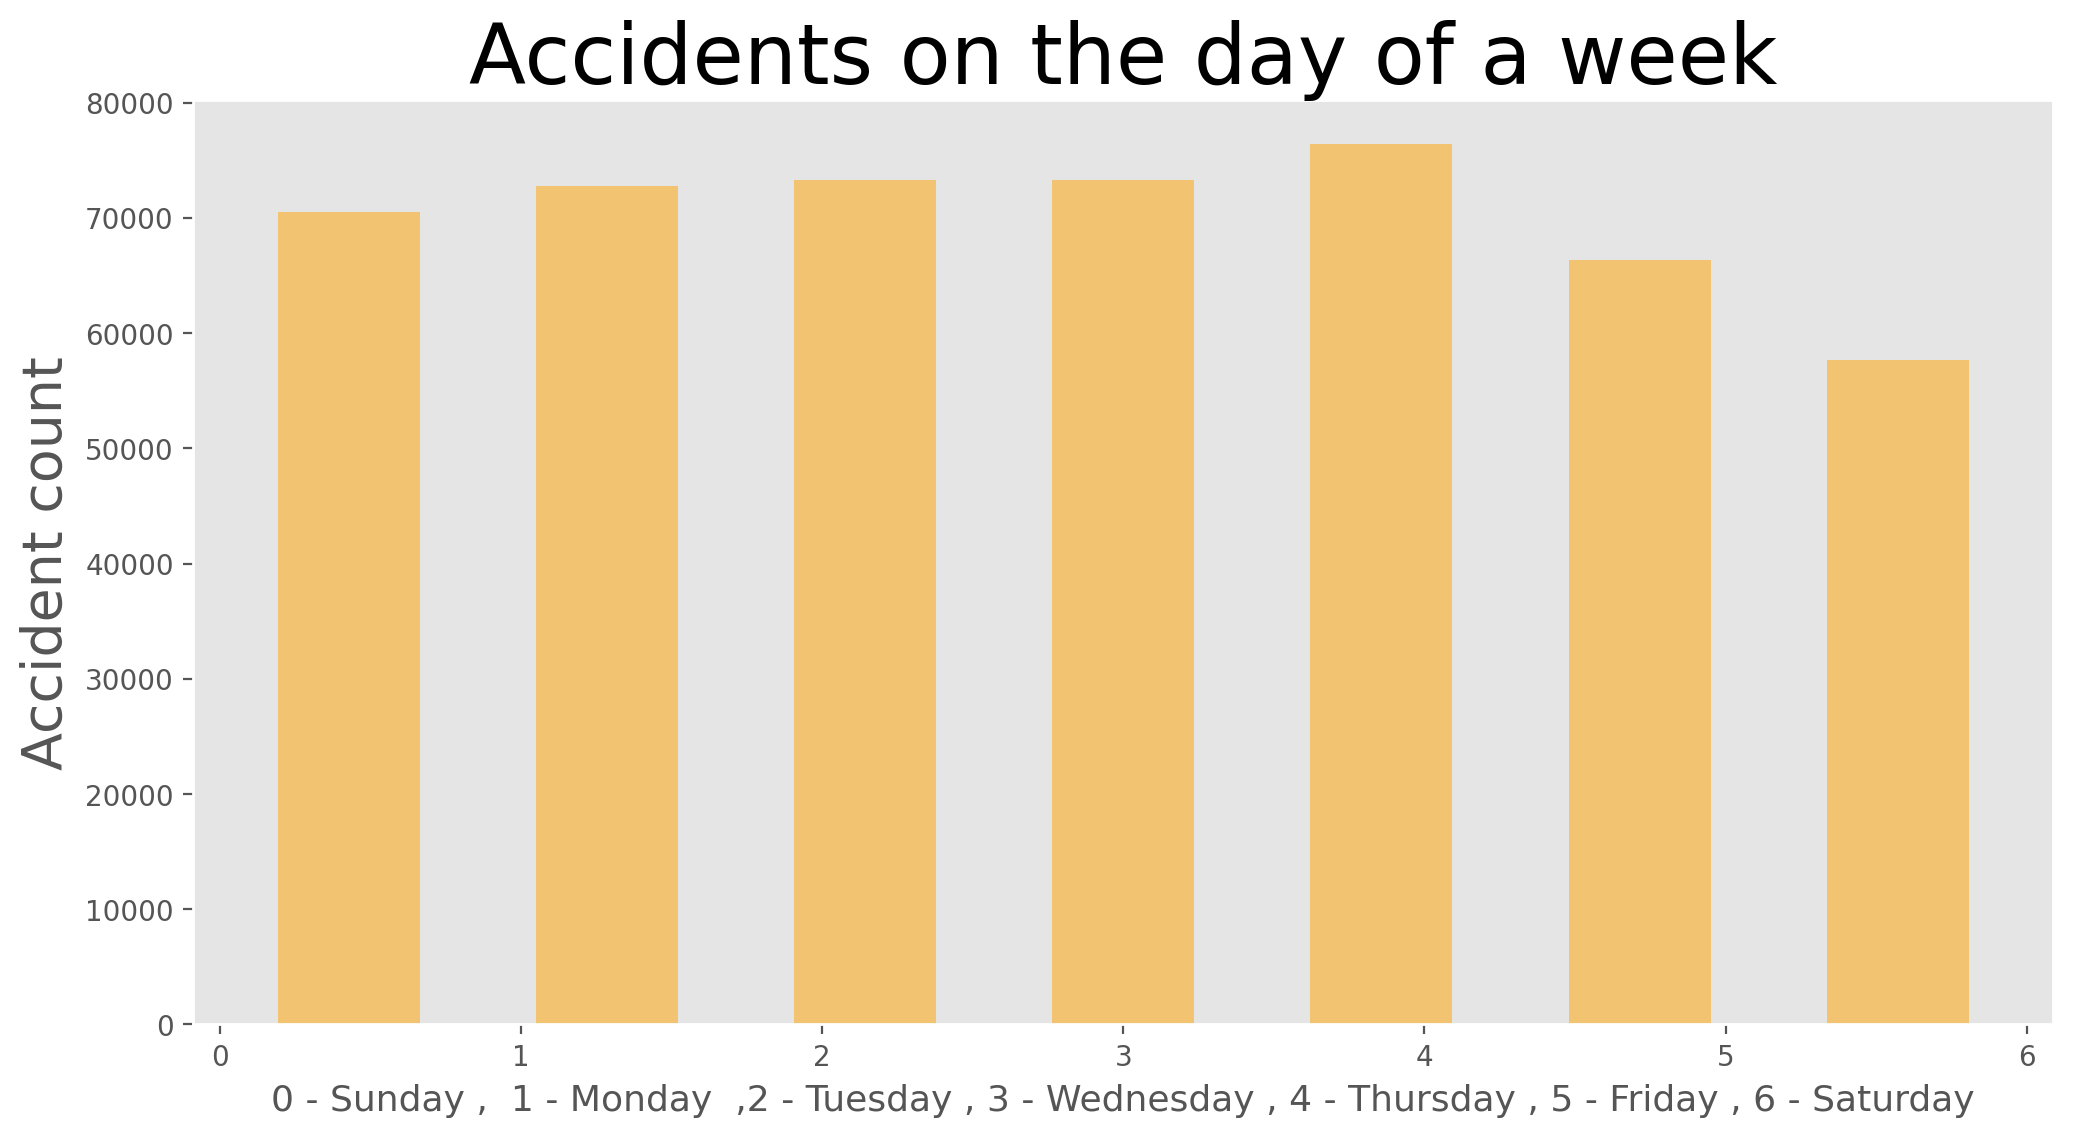

In [73]:
plt.figure(figsize=(12, 6))
accidents['Date_time'].dt.dayofweek.hist(bins=7, rwidth=0.55, alpha=0.5, color='orange')
plt.title('Accidents on the day of a week', fontsize=30)
plt.grid(False)
plt.ylabel('Accident count', fontsize=20)
plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday', fontsize=13)

As we can see that thursday has the highest amount of accidents in this dataset from 2005 to 2015. We have to keep in mind that accidents numbers could be depending on traffic amount on particular day.

Text(0, 0.5, 'Accident count')

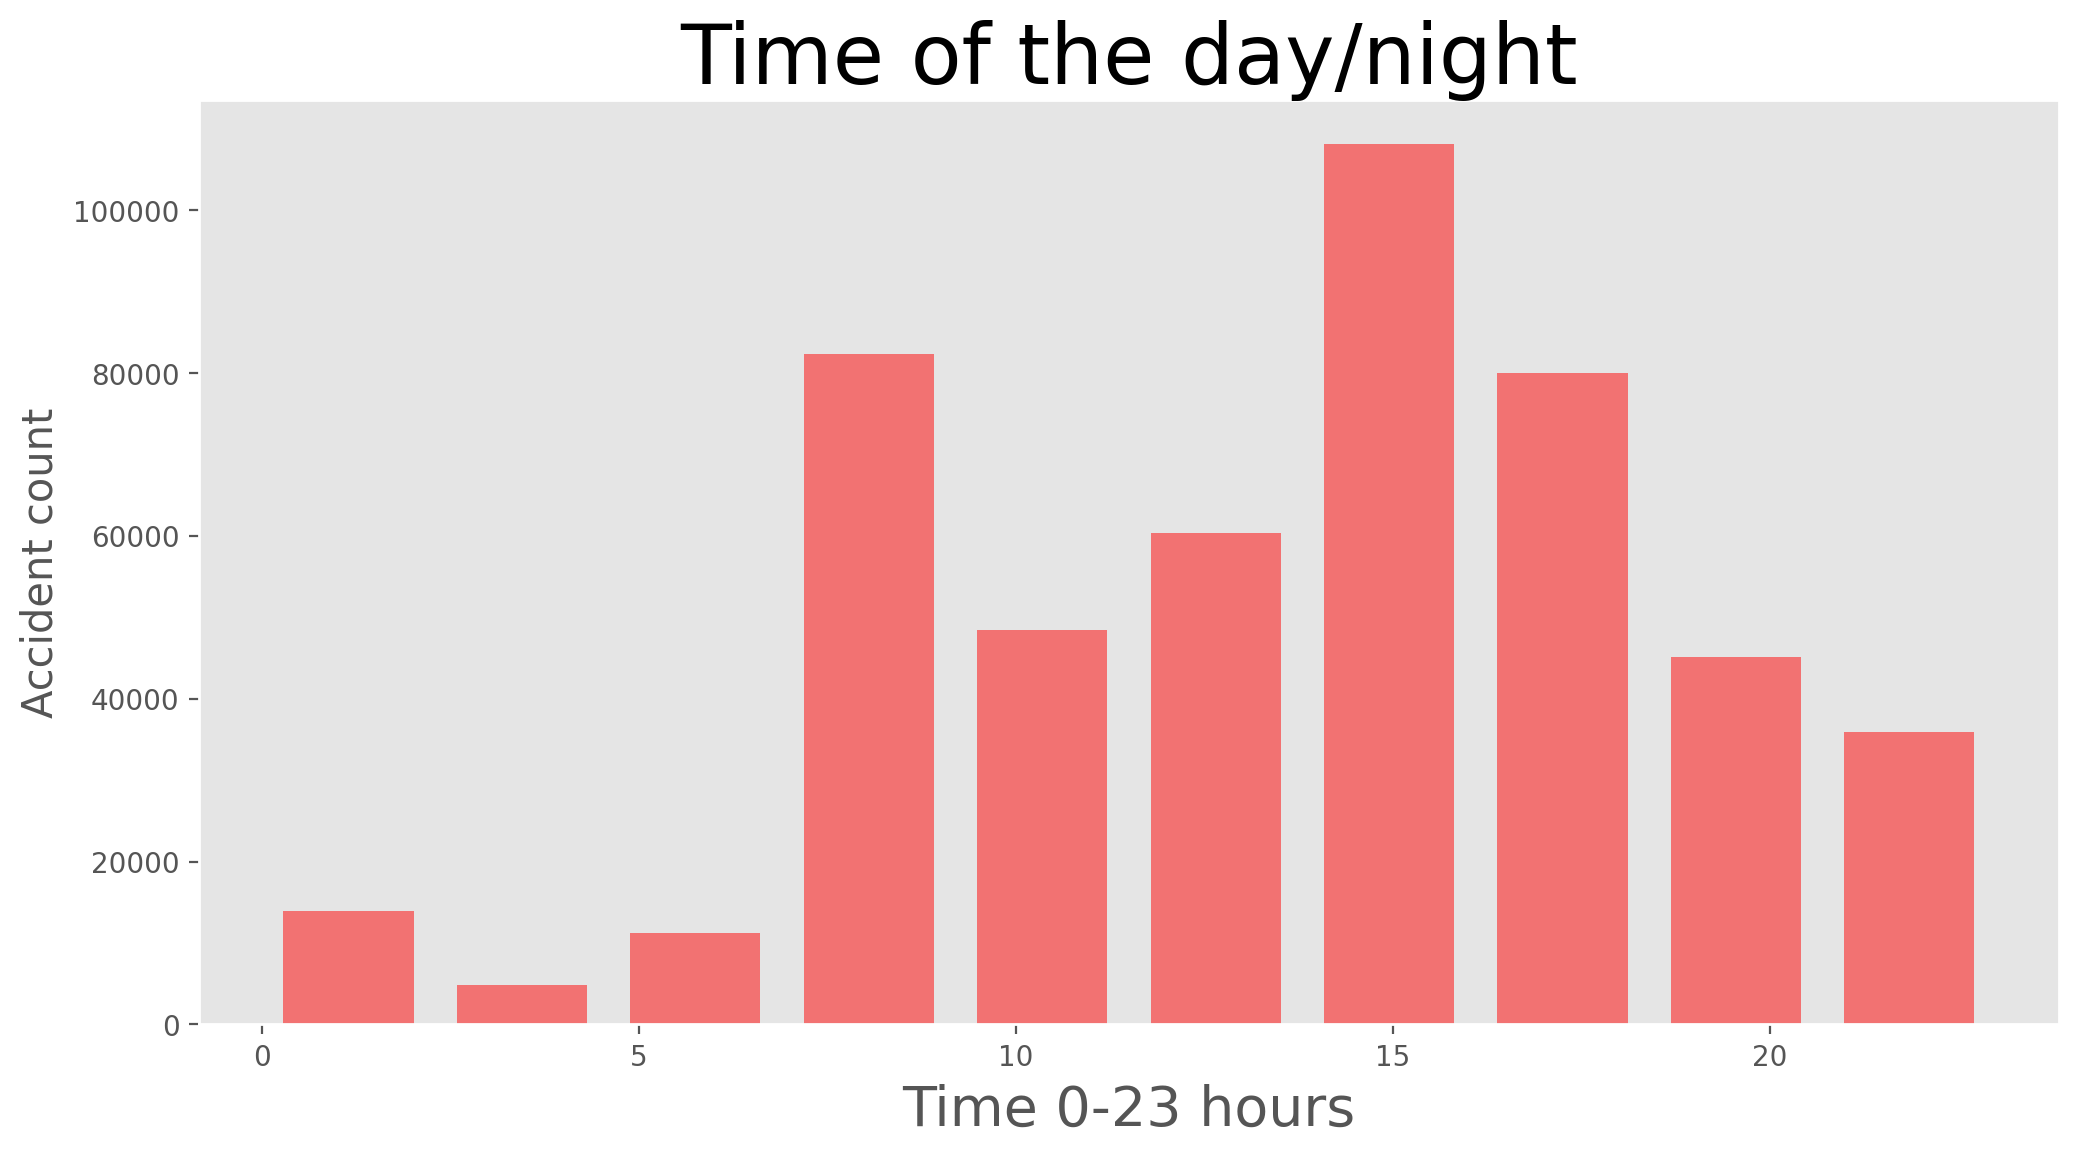

In [74]:
plt.figure(figsize=(12, 6))
accidents['Date_time'].dt.hour.hist(rwidth=0.75, alpha=0.50, color='red')
plt.title('Time of the day/night', fontsize=30)
plt.grid(False)
plt.xlabel('Time 0-23 hours', fontsize=20)
plt.ylabel('Accident count', fontsize=15)

We found out that the most of accidents happened around after noon. We can assume that this time of the day has the most traffic moving such as people leaving from work.


**Age band of casualities**

In this dataset, age band is grouped in 11 different codes. We will create the labels and pass it to the plot as xticks so we can have idea about the bins representation.

Text(0.5, 0, 'Age\xa0of\xa0Drivers')

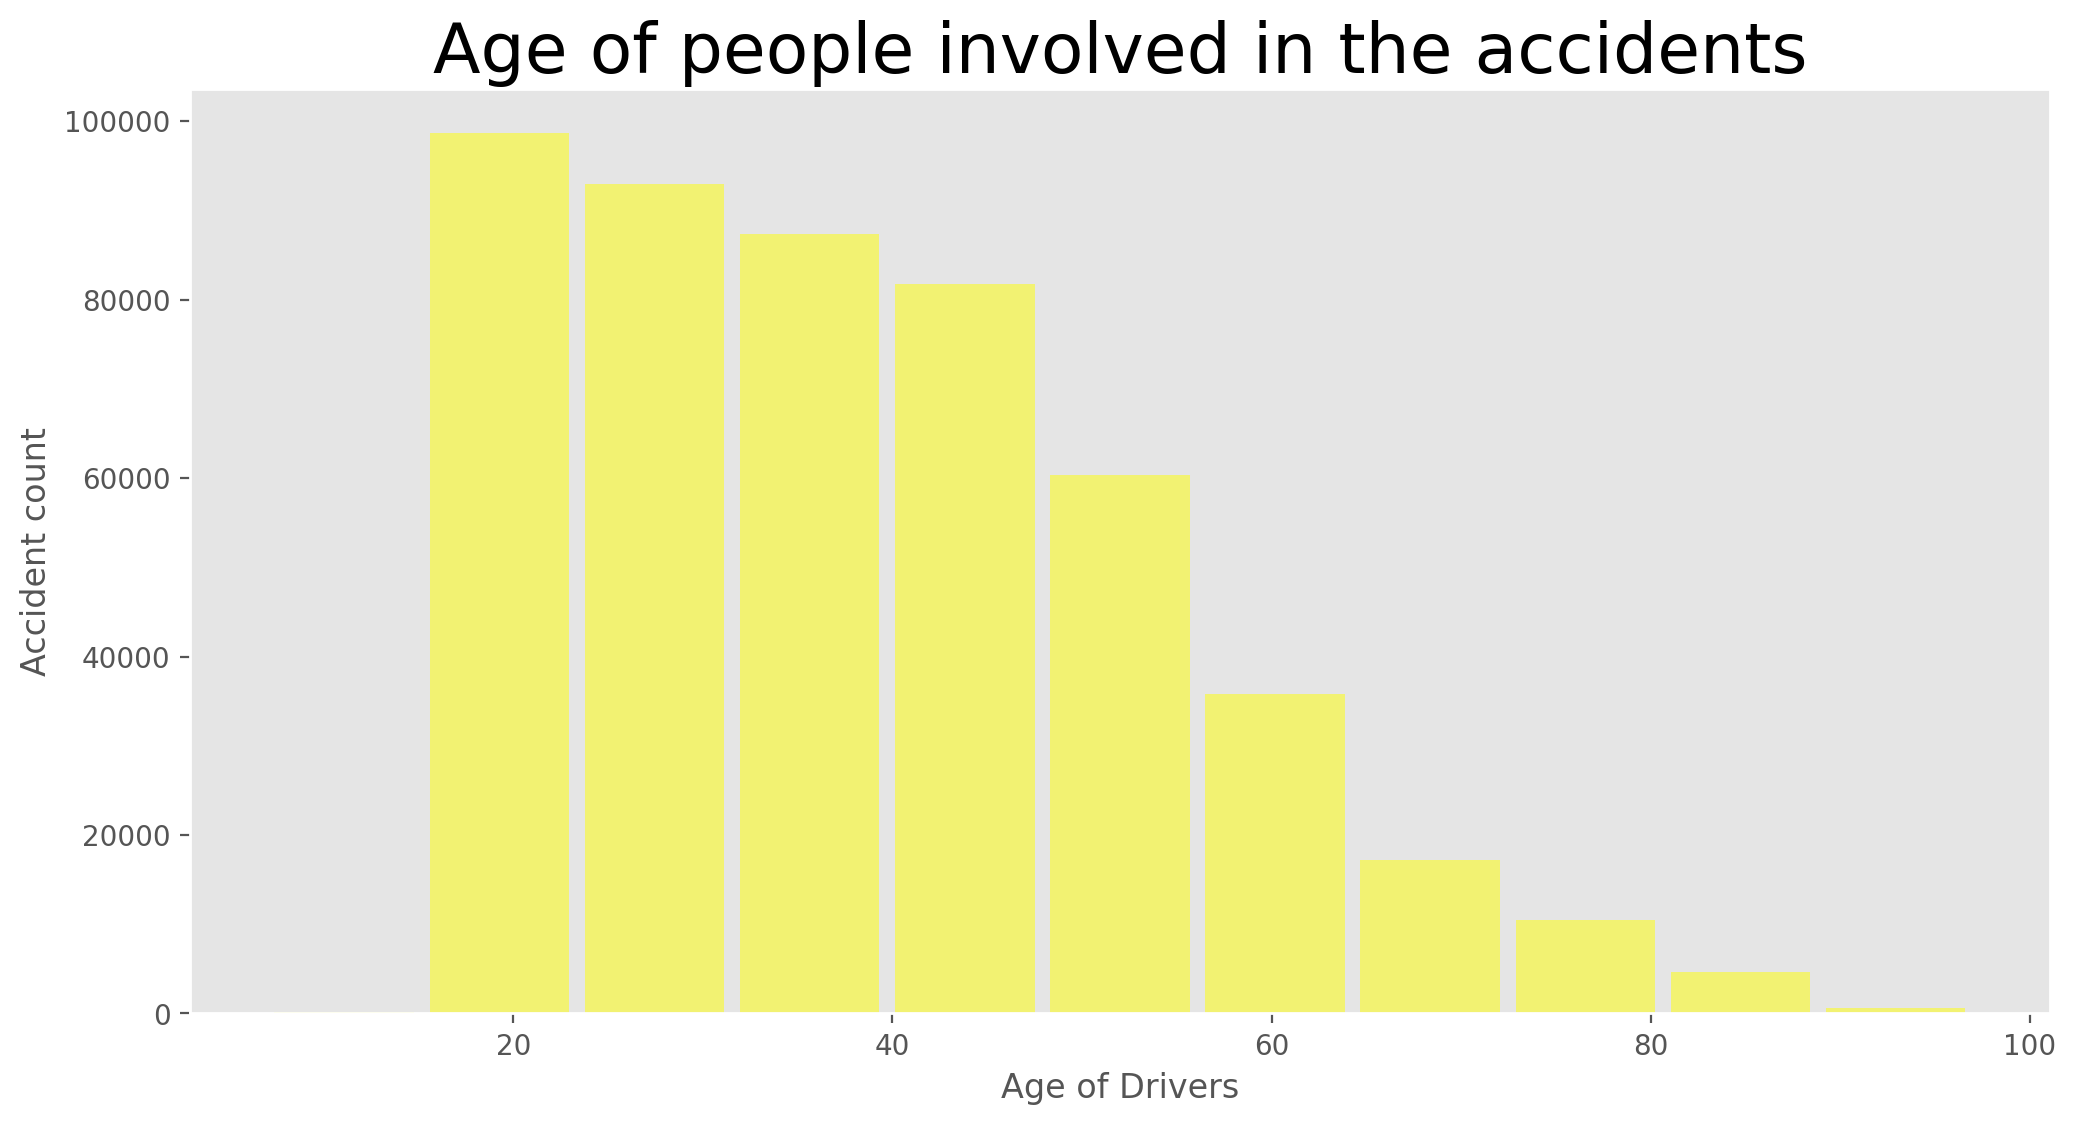

In [75]:
objects = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
           '36-45', '46-55','56-65','66-75','75+']
plt.figure(figsize=(12,6))
accidents.Age_of_Driver.hist(bins = 11,alpha=0.5,rwidth=0.90, color= 'yellow',)
plt.title('Age of people involved in the accidents', fontsize = 25)
plt.grid(False)
y_pos = np.arange(len(objects))
#plt.xticks(y_pos , objects)
plt.ylabel('Accident count')
plt.xlabel('Age of Drivers')

This is very interesting fact about this dataset. Most of the drivers age is around 20 to 35 who are involved in the accident. However, we do not know the number of drivers with age 20 to 35 on the road compare to other ages. Intutively, I would assume that the driver with age 20 to 35 are more in the number of drivers with different age.

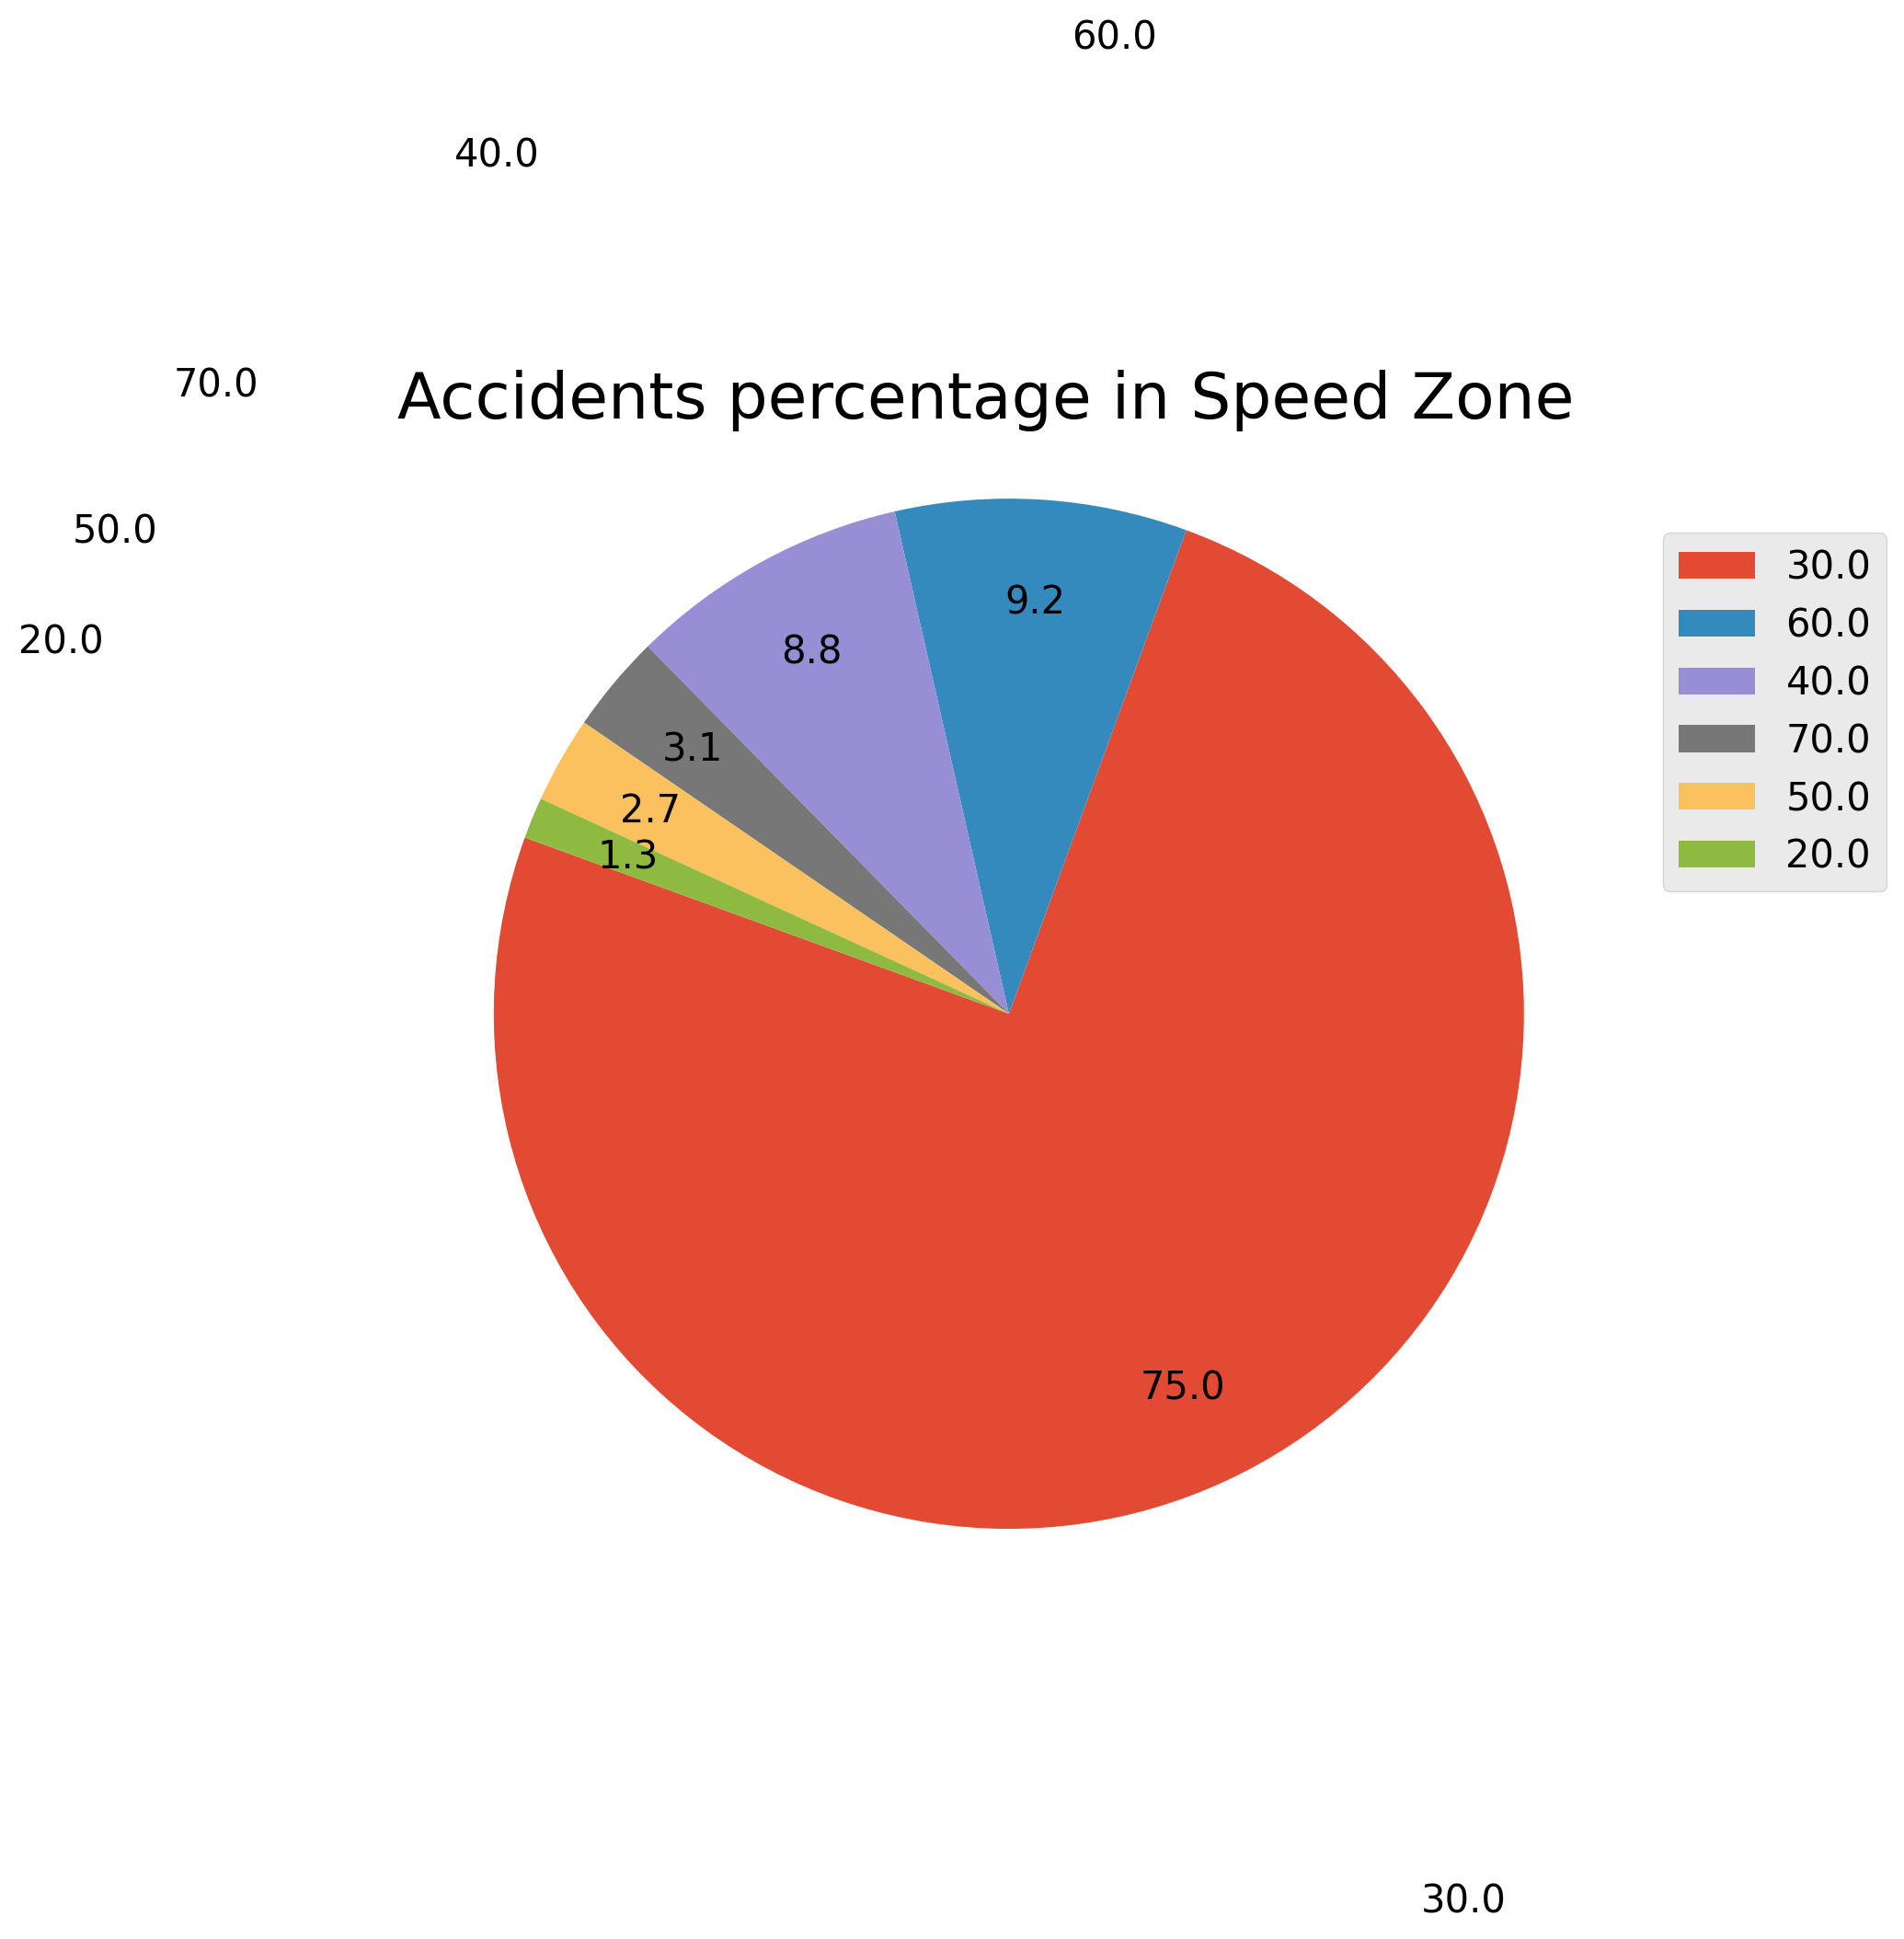

In [82]:
speed_zones = accidents[accidents['Speed_limit'].isin([20.0, 30.0, 40.0, 50.0, 60.0, 70.0])]
speed = speed_zones['Speed_limit'].value_counts()

explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0)  # Adjust as needed
plt.figure(figsize=(10, 8))
plt.pie(speed.values, labels=speed.index, autopct='%.1f', pctdistance=0.8, labeldistance=1.9,
        explode=explode, shadow=False, startangle=160, textprops={'fontsize': 15})

plt.axis('equal')
plt.legend(speed.index, bbox_to_anchor=(1, 0.7), loc="center right", fontsize=15,
           bbox_transform=plt.gcf().transFigure)
plt.figtext(.5, .9, 'Accidents percentage in Speed Zone', fontsize=25, ha='center')
plt.show()

Most of the accidents occured on the road where the speed limit is 30. I was expecting more accidents on highway or major roadways. Some of the accidents could be cause of stop sign, changing lanes or turning into parking lot etc.

**Co-relation between variables**


Since our dataset is in numeric values. We can findout correlation between columns.

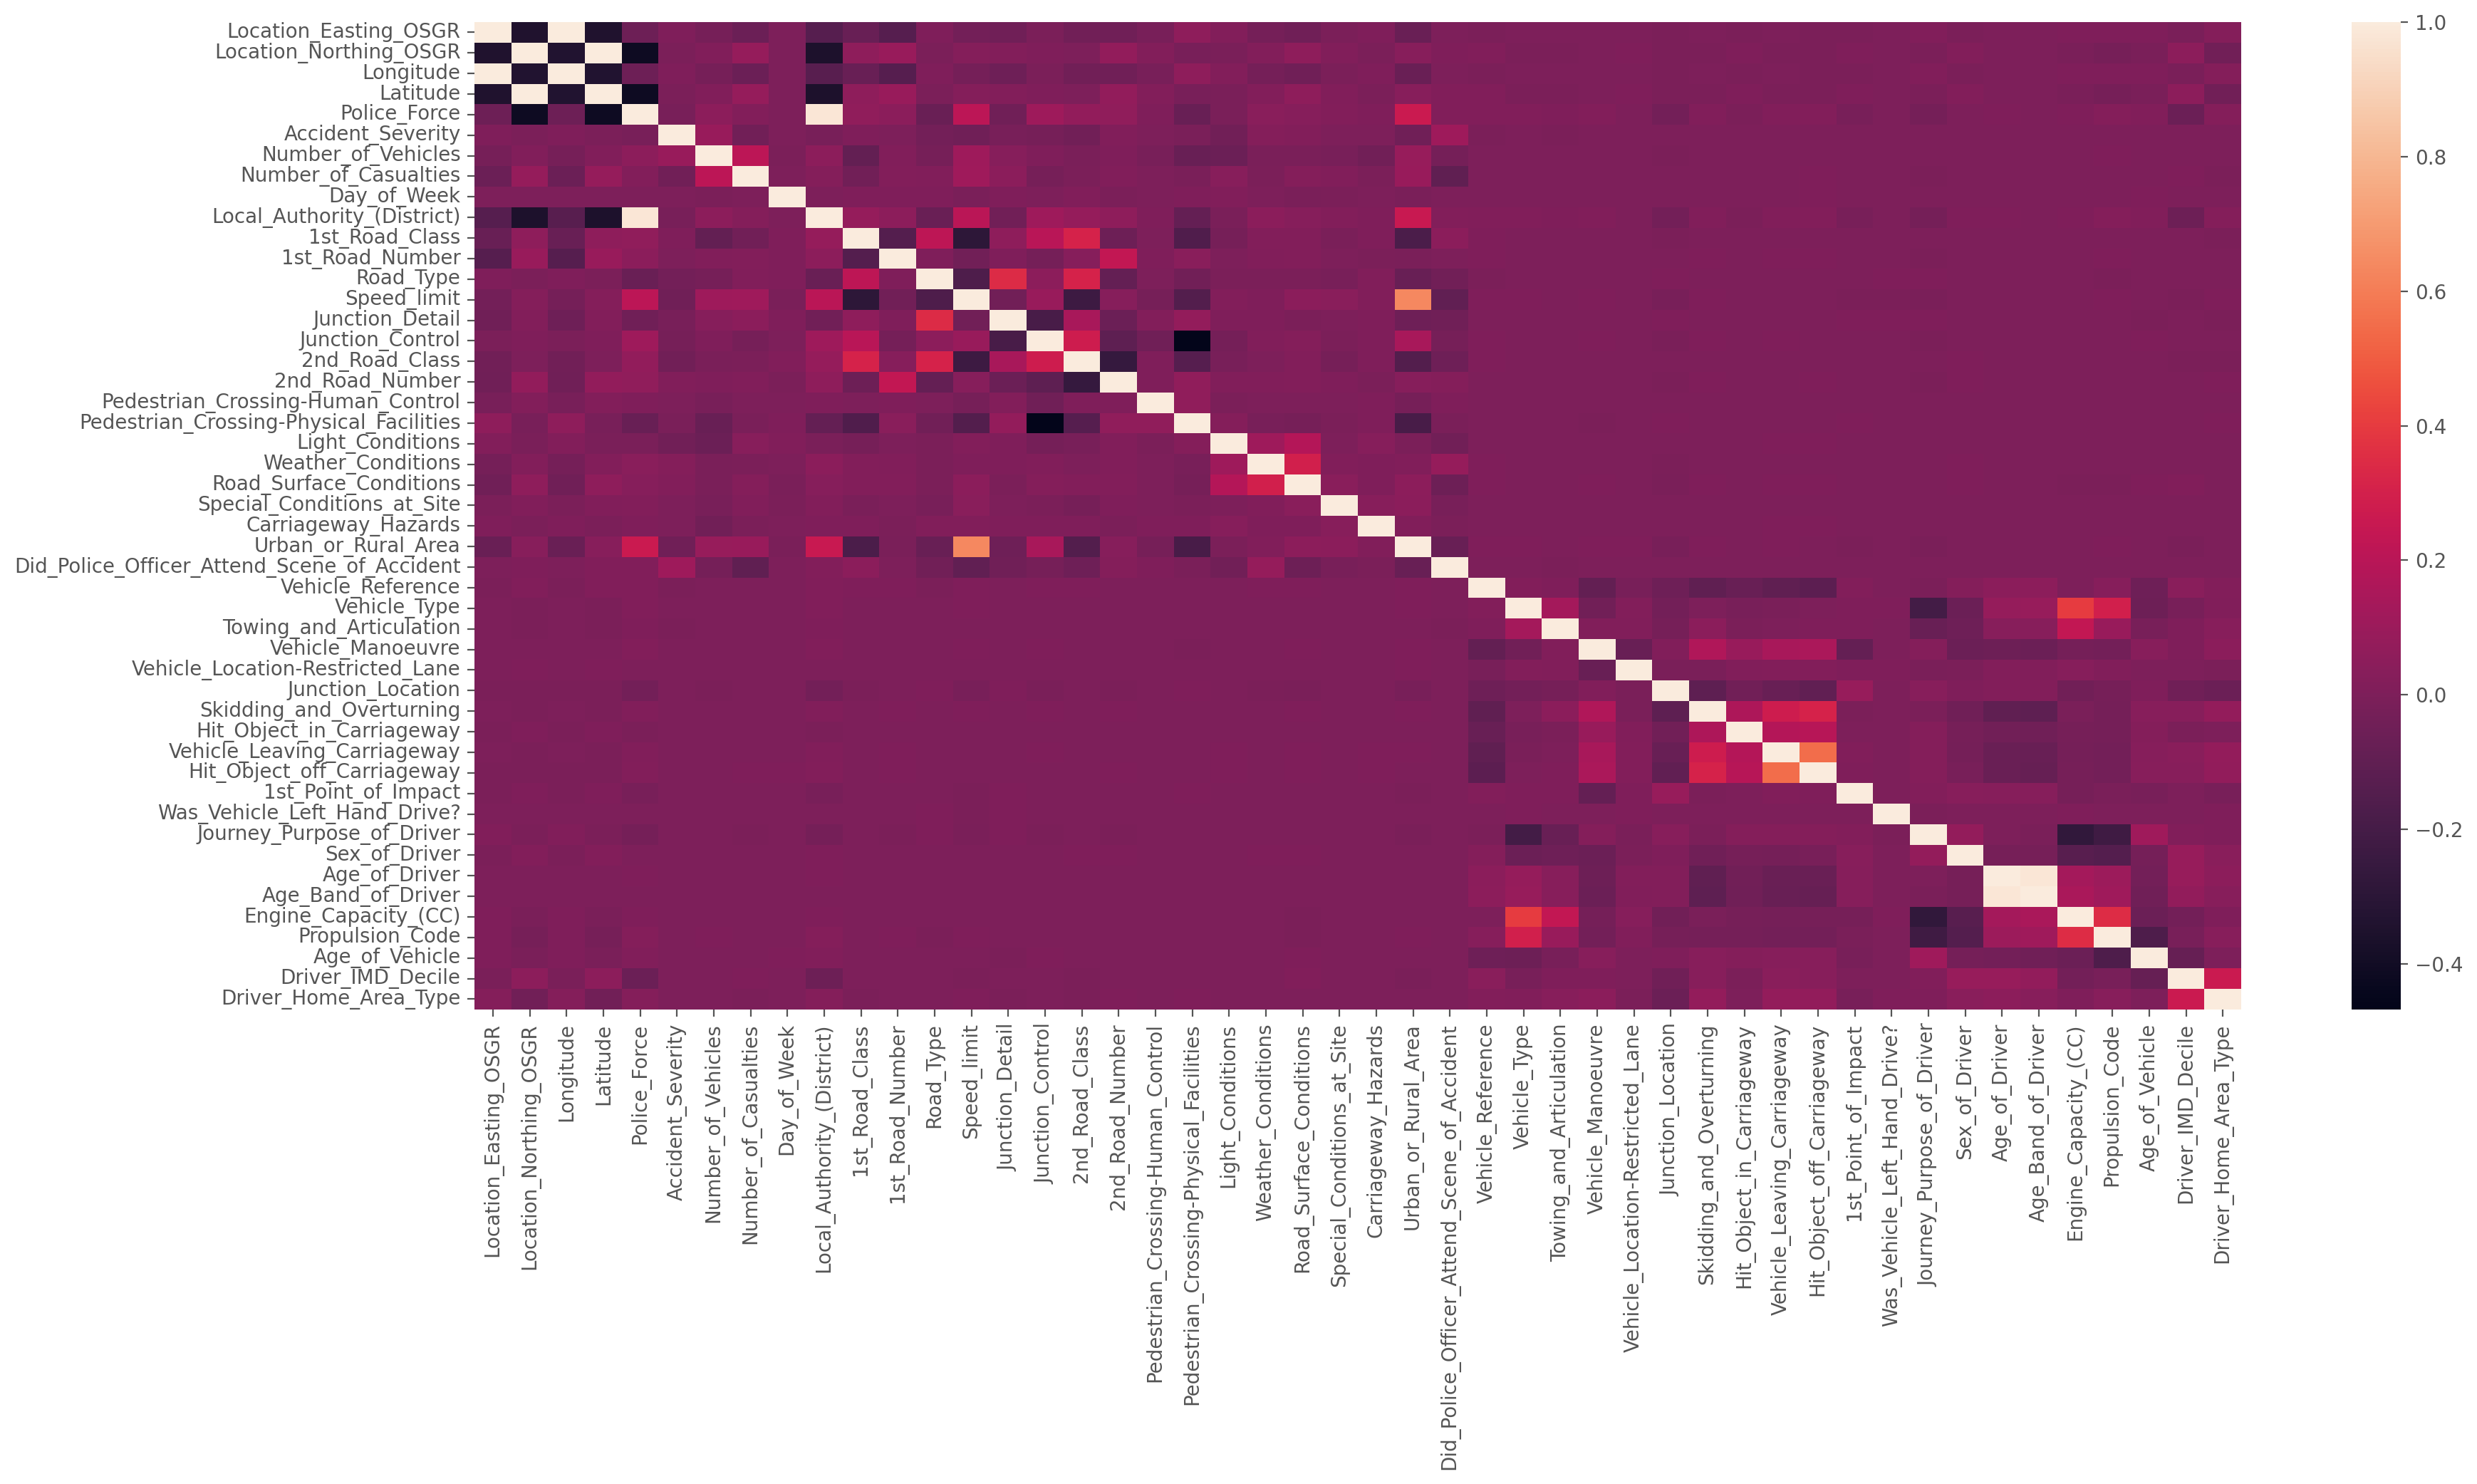

In [83]:
corr = accidents.corr()
plt.subplots(figsize=(20, 9))
sns.heatmap(corr)
plt.show()

As we see that there is not so much strong correlations between any variables. I was expecting weather condition to be strong correlation with any of the variable.
- There is only one postiive strong correlation between speed limit and Urban or Rural Area.

In [84]:
# Filter accidents for the year 2014
accidents_2014 = accidents[accidents.Date_time.dt.year == 2014]

# Filter accidents for severity level 1 in 2014
accidents_2014_01 = accidents_2014[accidents_2014.Accident_Severity == 1]

# Filter accidents for severity level 2 in 2014
accidents_2014_02 = accidents_2014[accidents_2014.Accident_Severity == 2]

# Filter accidents for severity level 3 in 2014
accidents_2014_03 = accidents_2014[accidents_2014.Accident_Severity == 3]

print("Done filtering data for 2014.")

Done filtering data for 2014.


In [86]:
# Select only the numeric columns
numeric_cols = accidents.select_dtypes(include=['float64', 'int64'])

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(numeric_cols.columns), ncols=1, figsize=(10, 6 * len(numeric_cols.columns)))

# Define a list of colors
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow']

# Plot histograms for each numeric column
for i, col in enumerate(numeric_cols.columns):
    ax = axes[i]
    ax.hist(accidents[col], bins=30, color=colors[i % len(colors)], alpha=0.7)  # Use modulo to cycle through colors
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Machine Learning**


We will be looking at different columns to figure out predicting about the accidents severity. After we can predict the accident severity, we can make some recommendation to law enforcement for looking into this and be prepared for the future. We can also have more emergency medical services available for those situations.

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss
print("done")

done


**Normalize the Data**


There are few columns that we will standarize, so it would not effect negatively on our machine learning algorithms. Age of driver is from 18 to 88 in the dataset and we can normalize it. Also, the age of vehicle is also from 0 to 100 and it can skew the performance of your machine learning algorithm and we will normalize this predictor too.

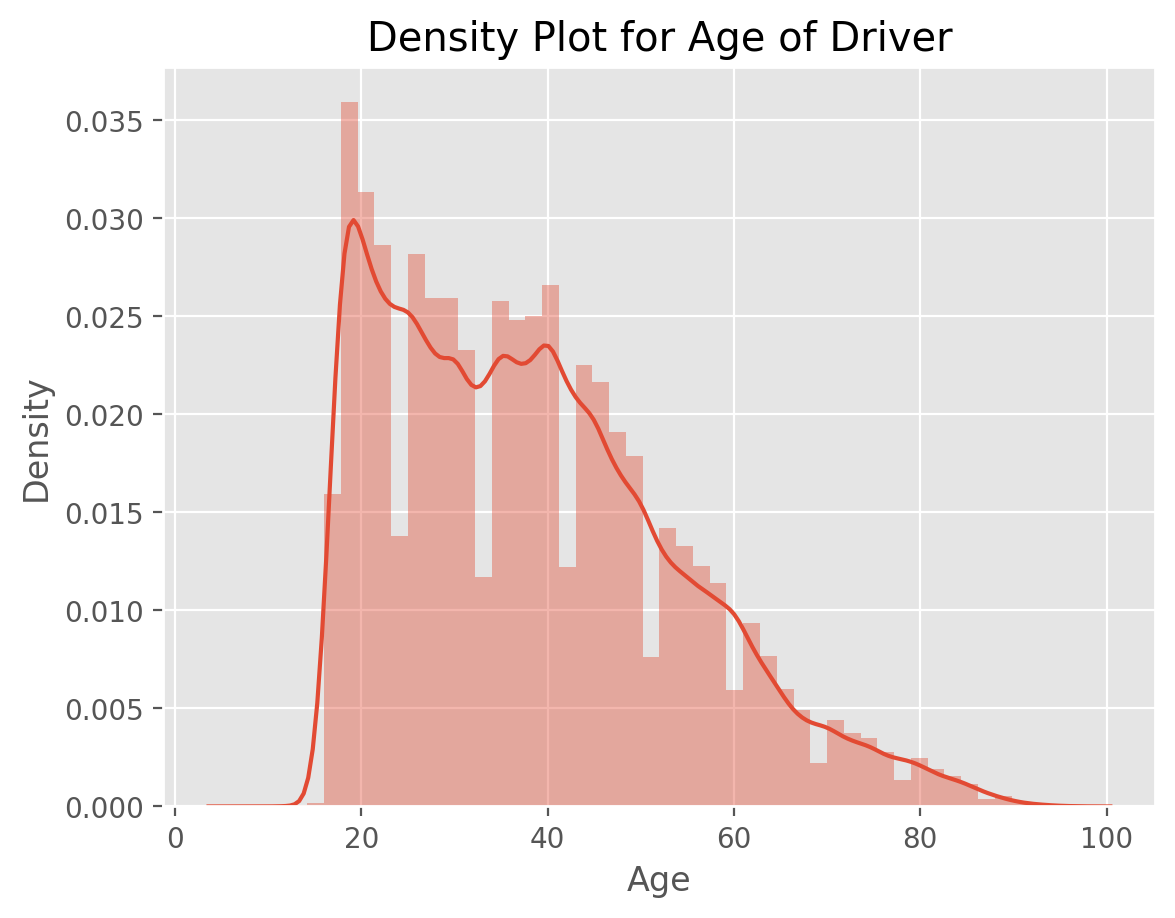

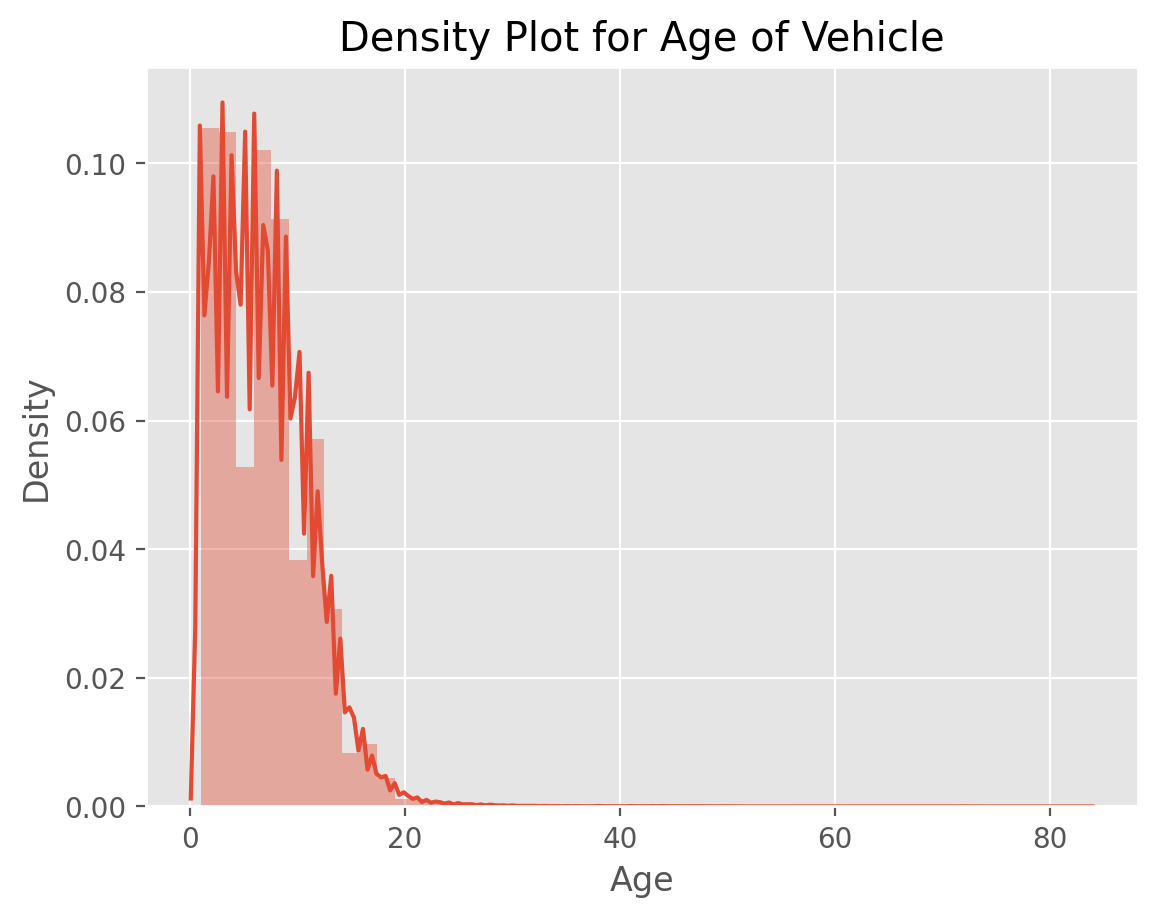

done


In [102]:
# Create a density plot for the age of drivers
sns.distplot(accidents['Age_of_Driver'])
plt.title('Density Plot for Age of Driver')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Create a density plot for the age of vehicles
sns.distplot(accidents['Age_of_Vehicle'])
plt.title('Density Plot for Age of Vehicle')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

print("done")

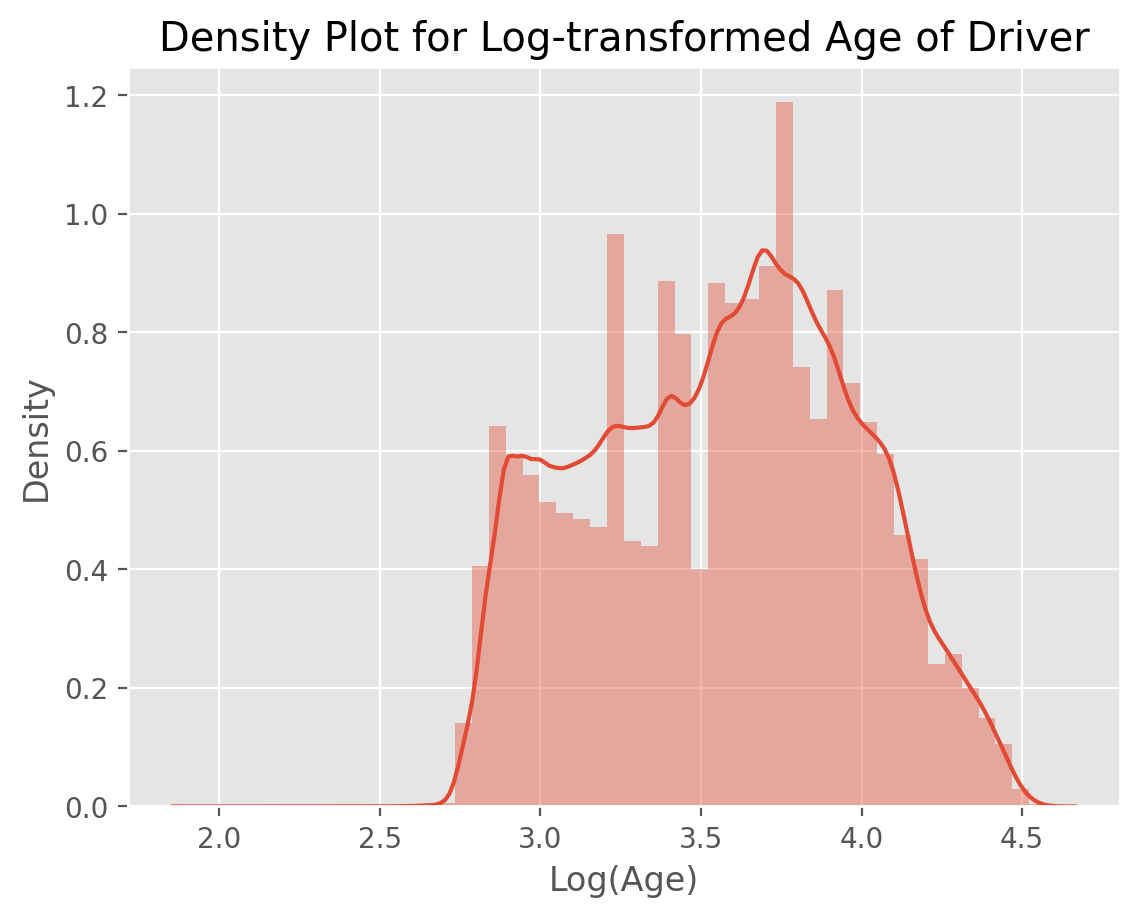

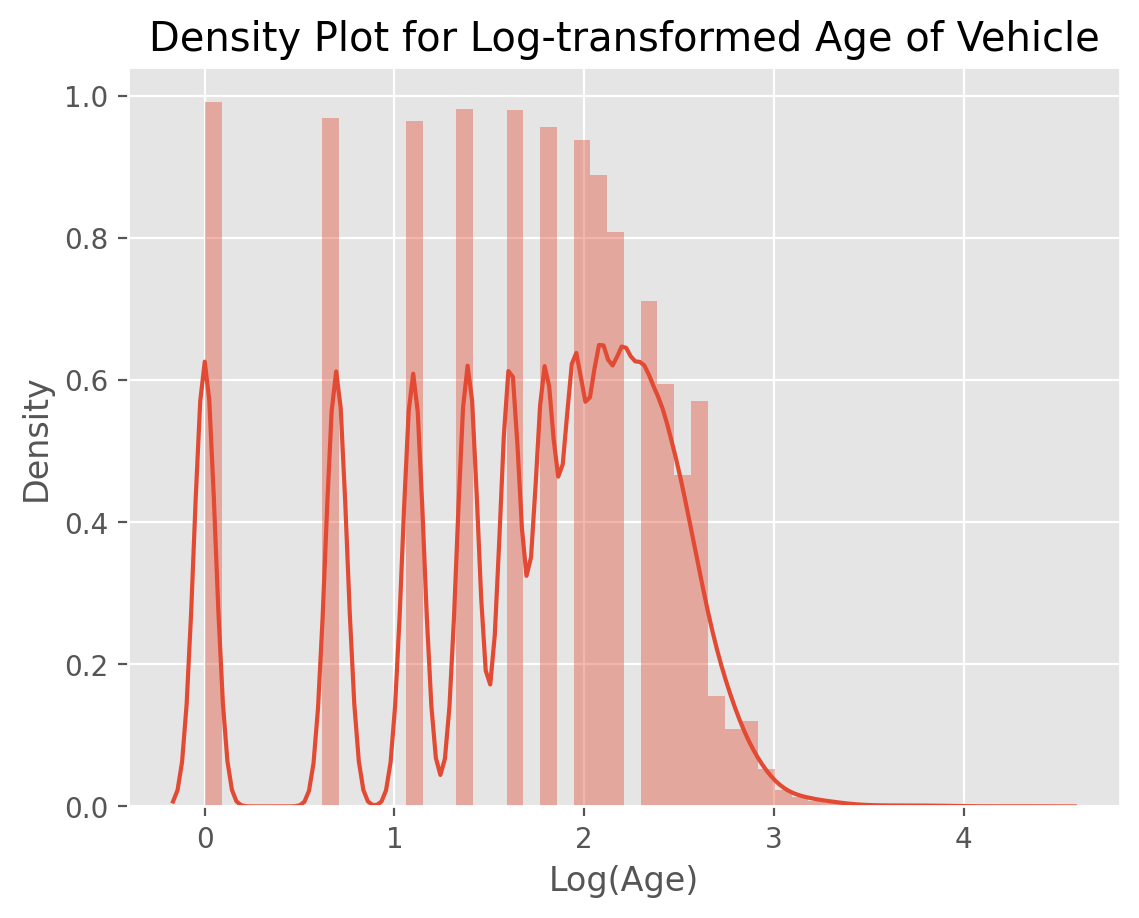

done


In [103]:
# Log-transform the 'Age_of_Driver' and 'Age_of_Vehicle' columns
accidents['Age_of_Driver'] = np.log(accidents['Age_of_Driver'])
accidents['Age_of_Vehicle'] = np.log(accidents['Age_of_Vehicle'])

# Create a density plot for the log-transformed 'Age_of_Driver' column
sns.distplot(accidents['Age_of_Driver'])
plt.title('Density Plot for Log-transformed Age of Driver')
plt.xlabel('Log(Age)')
plt.ylabel('Density')
plt.show()

# Create a density plot for the log-transformed 'Age_of_Vehicle' column
sns.distplot(accidents['Age_of_Vehicle'])
plt.title('Density Plot for Log-transformed Age of Vehicle')
plt.xlabel('Log(Age)')
plt.ylabel('Density')
plt.show()

print("done")

In [104]:
accidents.head()

Accident_Index_accidents  Location_Easting_OSGR  Location_Northing_OSGR  \
6             200501BS00007               524220.0                180830.0   
9             200501BS00011               524550.0                180810.0   
10            200501BS00012               526240.0                178900.0   
11            200501BS00014               526170.0                177690.0   
13            200501BS00016               527990.0                178690.0   

    Longitude   Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
6   -0.211277  51.512695           1.0                3.0                 2.0   
9   -0.206531  51.512443           1.0                3.0                 2.0   
10  -0.182872  51.494902           1.0                3.0                 1.0   
11  -0.184312  51.484044           1.0                3.0                 2.0   
13  -0.157753  51.492622           1.0                3.0                 2.0   

    Number_of_Casualties  Day_of_Week  ...  Journey_Purpose_of_Driver  \
6                    1.0          5.0  ...                         15   
9                    5.0          7.0  ...                         15   
10                   1.0          1.0  ...                         15   
11                   1.0          3.0  ...                         15   
13                   1.0          3.0  ...                          1   

   Sex_of_Driver  Age_of_Driver  Age_Band_of_Driver  Engine_Capacity_(CC)  \
6              1       3.931826                   8                  2976   
9              1       3.713572                   7                  4266   
10             1       4.219508                  10                  5343   
11             1       3.555348                   6                  1998   
13             1       3.737670                   7                  8268   

    Propulsion_Code  Age_of_Vehicle  Driver_IMD_Decile  Driver_Home_Area_Type  \
6                 1        0.000000                  4                      1   
9                 1        1.386294                  6                      1   
10                1        2.772589                  6                      1   
11                1        2.564949                  3                      1   
13                2        0.693147                  2                      1   

             Date_time  
6  2005-01-13 20:40:00  
9  2005-01-15 16:00:00  
10 2005-01-16 00:42:00  
11 2005-01-25 20:48:00  
13 2005-01-18 05:01:00  

[5 rows x 53 columns]

**Spliting the data into training data and test data**


We will also consider few features as predictors for machine learning algorithm.

In [105]:
accident_ml = accidents.drop('Accident_Severity' ,axis=1)
accident_ml = accident_ml[['Did_Police_Officer_Attend_Scene_of_Accident' , 'Age_of_Driver' ,'Vehicle_Type', 'Age_of_Vehicle','Engine_Capacity_(CC)','Day_of_Week' , 'Weather_Conditions' , 'Road_Surface_Conditions'
                          , 'Light_Conditions', 'Sex_of_Driver' ,'Speed_limit']]

accident_ml.head()

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(accident_ml.values,
                                              accidents['Accident_Severity'].values,test_size=0.20, random_state=99)
print("done")

done


In [106]:
# y_train[100:200]
# print(np.argmin(y_train))
print(y_train[365])
print(X_train[365])

3.0
[1.00000000e+00 4.00733319e+00 9.00000000e+00 2.19722458e+00
 1.29900000e+03 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 2.00000000e+00 3.00000000e+01]


In [107]:
y_train

array([3., 3., 3., ..., 3., 3., 3.])

In [108]:
# Access the last sample in the training set
last_index = len(y_train) - 1
print(y_train[last_index])
print(X_train[last_index])

3.0
[ 2.          3.49650756  3.          2.39789527 98.          2.
  1.          1.          1.          1.         30.        ]


In [109]:
# X_train[]
accident_ml.head()

Did_Police_Officer_Attend_Scene_of_Accident  Age_of_Driver  Vehicle_Type  \
6                                           1.0       3.931826             9   
9                                           1.0       3.713572             9   
10                                          1.0       4.219508             9   
11                                          1.0       3.555348             9   
13                                          1.0       3.737670            11   

    Age_of_Vehicle  Engine_Capacity_(CC)  Day_of_Week  Weather_Conditions  \
6         0.000000                  2976          5.0                 1.0   
9         1.386294                  4266          7.0                 1.0   
10        2.772589                  5343          1.0                 1.0   
11        2.564949                  1998          3.0                 1.0   
13        0.693147                  8268          3.0                 2.0   

    Road_Surface_Conditions  Light_Conditions  Sex_of_Driver  Speed_limit  
6                       1.0               4.0              1         30.0  
9                       1.0               1.0              1         30.0  
10                      1.0               4.0              1         30.0  
11                      2.0               4.0              1         30.0  
13                      2.0               4.0              1         30.0

In [110]:
X_train[0]

array([1.00000000e+00, 4.12713439e+00, 1.90000000e+01, 2.48490665e+00,
       1.99800000e+03, 6.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       4.00000000e+00, 1.00000000e+00, 3.00000000e+01])

**Random Forest**

In [111]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test,
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

print("done")

Accuracy 85.79
              precision    recall  f1-score   support

         1.0   0.000000  0.000000  0.000000       770
         2.0   0.141925  0.022113  0.038264     11803
         3.0   0.872168  0.981124  0.923443     85451

    accuracy                       0.857943     98024
   macro avg   0.338031  0.334412  0.320569     98024
weighted avg   0.777389  0.857943  0.809605     98024

done


In [112]:
sk_report = classification_report(
    digits=6,
    y_true=y_test,
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

print("done")

Accuracy 85.79
              precision    recall  f1-score   support

         1.0   0.000000  0.000000  0.000000       770
         2.0   0.141925  0.022113  0.038264     11803
         3.0   0.872168  0.981124  0.923443     85451

    accuracy                       0.857943     98024
   macro avg   0.338031  0.334412  0.320569     98024
weighted avg   0.777389  0.857943  0.809605     98024

done


In [113]:
#Predict
# sample = [7.0,3.2,4.7,1.4]
# print("done")
# sample.reshape(1, -1)
# result = clf.predict(sample).reshape(1, -1)
# result.reshape(1,-1)



print(accident_ml.head())
print(X_train.shape)
print(X_train[0])
print("done")

    Did_Police_Officer_Attend_Scene_of_Accident  Age_of_Driver  Vehicle_Type  \
6                                           1.0       3.931826             9   
9                                           1.0       3.713572             9   
10                                          1.0       4.219508             9   
11                                          1.0       3.555348             9   
13                                          1.0       3.737670            11   

    Age_of_Vehicle  Engine_Capacity_(CC)  Day_of_Week  Weather_Conditions  \
6         0.000000                  2976          5.0                 1.0   
9         1.386294                  4266          7.0                 1.0   
10        2.772589                  5343          1.0                 1.0   
11        2.564949                  1998          3.0                 1.0   
13        0.693147                  8268          3.0                 2.0   

    Road_Surface_Conditions  Light_Conditions  Sex_of_Dr

In [115]:
Y_pred = random_forest.predict(X_test[365].reshape(1, -1))
print(Y_pred)

[3.]


**Naive Bayes**

In [117]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the classifier
naive_bayes.fit(X_train, y_train)

# Make predictions
Y_pred_nb = naive_bayes.predict(X_test)

# Calculate accuracy
acc_naive_bayes = accuracy_score(y_test, Y_pred_nb) * 100

# Print accuracy
print("Accuracy:", acc_naive_bayes)

# Print classification report
sk_report_nb = classification_report(y_test, Y_pred_nb, digits=6)
print(sk_report_nb)

# Print confusion matrix
confusion_matrix_nb = confusion_matrix(y_test, Y_pred_nb)
print("Confusion Matrix:")
print(confusion_matrix_nb)

# Crosstab
pd.crosstab(y_test, Y_pred_nb, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy: 86.62980494572757
              precision    recall  f1-score   support

         1.0   0.021097  0.012987  0.016077       770
         2.0   0.123762  0.002118  0.004165     11803
         3.0   0.871954  0.993353  0.928703     85451

    accuracy                       0.866298     98024
   macro avg   0.338938  0.336153  0.316315     98024
weighted avg   0.775181  0.866298  0.810211     98024

Confusion Matrix:
[[   10     2   758]
 [   71    25 11707]
 [  393   175 84883]]


Predicted  1.0  2.0    3.0    All
Actual                           
1.0         10    2    758    770
2.0         71   25  11707  11803
3.0        393  175  84883  85451
All        474  202  97348  98024

In [118]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate classification report
sk_report_nb = classification_report(y_true=y_test, y_pred=Y_pred_nb, digits=6)
print("Naive Bayes Classification Report:")
print(sk_report_nb)

# Generate confusion matrix
confusion_matrix_nb = confusion_matrix(y_true=y_test, y_pred=Y_pred_nb)
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix_nb)

# Crosstab
pd.crosstab(y_test, Y_pred_nb, rownames=['Actual'], colnames=['Predicted'], margins=True)

Naive Bayes Classification Report:
              precision    recall  f1-score   support

         1.0   0.021097  0.012987  0.016077       770
         2.0   0.123762  0.002118  0.004165     11803
         3.0   0.871954  0.993353  0.928703     85451

    accuracy                       0.866298     98024
   macro avg   0.338938  0.336153  0.316315     98024
weighted avg   0.775181  0.866298  0.810211     98024

Naive Bayes Confusion Matrix:
[[   10     2   758]
 [   71    25 11707]
 [  393   175 84883]]


Predicted  1.0  2.0    3.0    All
Actual                           
1.0         10    2    758    770
2.0         71   25  11707  11803
3.0        393  175  84883  85451
All        474  202  97348  98024

In [119]:
# Instantiate the Naive Bayes model
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train, y_train)

# Make predictions
Y_pred_nb = naive_bayes.predict(X_test)

# Print the initial data
print(accident_ml.head())  # Assuming accident_ml is your DataFrame
print("Shape of X_train:", X_train.shape)
print("First sample in X_train:", X_train[0])  # Assuming X_train is a numpy array
print("Done")

    Did_Police_Officer_Attend_Scene_of_Accident  Age_of_Driver  Vehicle_Type  \
6                                           1.0       3.931826             9   
9                                           1.0       3.713572             9   
10                                          1.0       4.219508             9   
11                                          1.0       3.555348             9   
13                                          1.0       3.737670            11   

    Age_of_Vehicle  Engine_Capacity_(CC)  Day_of_Week  Weather_Conditions  \
6         0.000000                  2976          5.0                 1.0   
9         1.386294                  4266          7.0                 1.0   
10        2.772589                  5343          1.0                 1.0   
11        2.564949                  1998          3.0                 1.0   
13        0.693147                  8268          3.0                 2.0   

    Road_Surface_Conditions  Light_Conditions  Sex_of_Dr

In [121]:
Y_pred_nb = naive_bayes.predict(X_test[230].reshape(1, -1))
print(Y_pred_nb)

[3.]


**Logistic Regression**

In [122]:
# Instantiate the logistic regression model
logistic_regression = LogisticRegression()

# Train the model
logistic_regression.fit(X_train, y_train)

# Make predictions
Y_pred_logistic = logistic_regression.predict(X_test)

# Calculate accuracy
accuracy_logistic = logistic_regression.score(X_test, y_test)
acc_logistic = round(accuracy_logistic * 100, 2)

# Generate classification report
sk_report_logistic = classification_report(
    digits=6,
    y_true=y_test,
    y_pred=Y_pred_logistic
)

# Print accuracy and classification report
print("Accuracy:", acc_logistic)
print(sk_report_logistic)

# Generate confusion matrix
confusion_matrix_logistic = pd.crosstab(y_test, Y_pred_logistic, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion_matrix_logistic)

print("done")

Accuracy: 87.17
              precision    recall  f1-score   support

         1.0   0.000000  0.000000  0.000000       770
         2.0   0.000000  0.000000  0.000000     11803
         3.0   0.871735  1.000000  0.931473     85451

    accuracy                       0.871735     98024
   macro avg   0.290578  0.333333  0.310491     98024
weighted avg   0.759923  0.871735  0.811998     98024

Predicted    3.0    All
Actual                 
1.0          770    770
2.0        11803  11803
3.0        85451  85451
All        98024  98024
done


In [123]:
# Instantiate and train the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Make predictions
Y_pred_lr = logistic_regression.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, Y_pred_lr) * 100

# Generate classification report
report_lr = classification_report(y_test, Y_pred_lr)

# Generate confusion matrix
confusion_matrix_lr = pd.crosstab(y_test, Y_pred_lr, rownames=['Actual'], colnames=['Predicted'], margins=True)

# Print accuracy and classification report
print("Accuracy:", accuracy_lr)
print(report_lr)

# Print confusion matrix
print(confusion_matrix_lr)

print("done")

Accuracy: 87.17354933485677
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       770
         2.0       0.00      0.00      0.00     11803
         3.0       0.87      1.00      0.93     85451

    accuracy                           0.87     98024
   macro avg       0.29      0.33      0.31     98024
weighted avg       0.76      0.87      0.81     98024

Predicted    3.0    All
Actual                 
1.0          770    770
2.0        11803  11803
3.0        85451  85451
All        98024  98024
done


In [124]:
# Predict using logistic regression
sample = [7.0, 3.2, 4.7, 1.4]  # Your sample data for prediction
sample += [0] * 7  # Adding placeholder values for the missing features
sample = np.array(sample).reshape(1, -1)  # Reshape the sample data
result = logistic_regression.predict(sample)  # Use the trained logistic regression model for prediction
print("Prediction result:", result)

# Print the initial data
print(accident_ml.head())  # Assuming accident_ml is your DataFrame
print("Shape of X_train:", X_train.shape)
print("First sample in X_train:", X_train[0])  # Directly access the first sample in X_train
print("Done")

Prediction result: [3.]
    Did_Police_Officer_Attend_Scene_of_Accident  Age_of_Driver  Vehicle_Type  \
6                                           1.0       3.931826             9   
9                                           1.0       3.713572             9   
10                                          1.0       4.219508             9   
11                                          1.0       3.555348             9   
13                                          1.0       3.737670            11   

    Age_of_Vehicle  Engine_Capacity_(CC)  Day_of_Week  Weather_Conditions  \
6         0.000000                  2976          5.0                 1.0   
9         1.386294                  4266          7.0                 1.0   
10        2.772589                  5343          1.0                 1.0   
11        2.564949                  1998          3.0                 1.0   
13        0.693147                  8268          3.0                 2.0   

    Road_Surface_Conditions  Lig

In [126]:
sample = X_test[302].reshape(1, -1)
Y_pred_lr = logistic_regression.predict(sample)
print(Y_pred_lr)

[3.]


**Decision Tree**